In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plot_func(f, ylabel, xlabel):
    plt.plot(np.arange(-5, 6, 0.01), [f(z) for z in np.arange(-5, 6, 0.01)])
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.grid(True)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

# Activation functions

So far we have just been using the sigmoid activation function. But there are other choices which might work better!

## Sigmoid Activation

Below is the sigmoid function curve that we are familiar with.

$$a = \sigma (z) = \frac{1}{1 + e^{-z}}$$

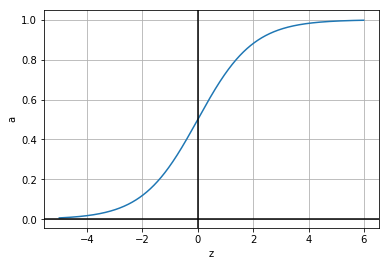

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

plot_func(sigmoid, 'a', 'z')

## $\tanh$ Activation

Another choice is the $\tanh$ function.

$$a = \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$

This can be observed as a **shifted sigmoid** such that it passes through the `(0, 0)` point and rescales. This works pretty well if we let the hidden layers' nodes use this activation function.

This kind of works like centering the data, which gives the input for the next layer normalized.

Andrew almost always prefers this activation function as compared to the sigmoid function. The one exception where sigmoid works better is at the output layer during **binary** classification.

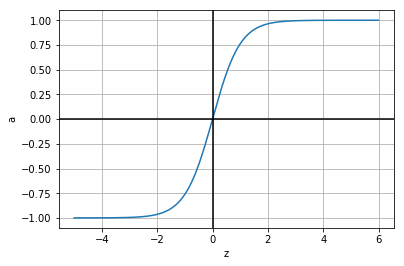

In [4]:
def tanh(z):
    return np.tanh(z)

plot_func(tanh, 'a', 'z')

The downside of both these activation functions is that when $z$ is very large or very small, the slope of the function becomes very close to $0$, which can slow down gradient descent.

## ReLU Activation

This leads to an alternative choice, which is known as the Rectified Linear Unit (ReLU).

$$a = \max(0, z)$$

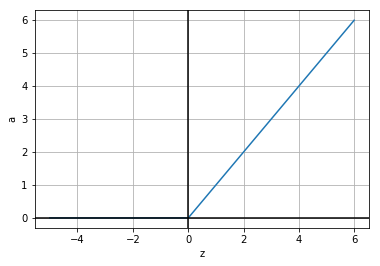

In [5]:
def relu(z):
    return np.max((0, z))

plot_func(relu, 'a', 'z')

### Leaky ReLU


A disadvantage of ReLU is that the gradient of the slope is just $0$ when $z < 0$. There is another version of ReLU known as **Leaky ReLU**. This is an alternative version of ReLU, where we still give a gradient value when $z < 0$.

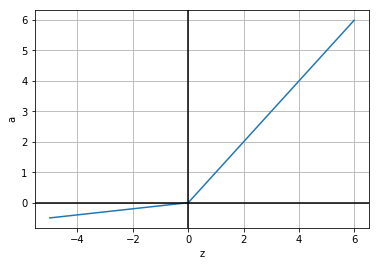

In [6]:
def leaky_relu(z):
    # 0.1 here can be a hyperparameter to be tuned
    return np.max((0.1 * z, z))

plot_func(leaky_relu, 'a', 'z')

## Rule of Thumb

1. If output is (0, 1) value, the sigmoid activation function is a good choice for the output layer
2. For all other units, ReLU is the default choice of activation function

# Why do we need non-linearity?

So why do we need an activation function? i.e. why not just let $a^{[1]} = z^{[1]}$?

The answer is pretty straightfoward. If we do that, the model is simply treating $\hat{y}$ as a **linear function** of $x$. It turns out that if we do this, no matter how many hidden layers we have, the model will always predict a linear model.

Without an activation function, the hidden layer will be useless because the composition of two linear functions, is just another linear function.

However the one place that we might want to use a linear activation function is the **output layer** for **regression** problems.

# Derivatives of Activation Functions

These are needed during backpropagation.

## Sigmoid Derivative

$$g(z) = \frac{1}{1 + e^{-z}}$$

$$\frac{\delta}{\delta z} g(z) = \frac{1}{1 + e^{-z}} \Big(1 - \frac{1}{1 + e^{-z}} \Big) = g(z)(1 - g(z))$$

Suppose:
1. When $z$ is large, $z = 10$, $g(z) \approx 1$, $g'(z) \approx 1(1- 1) \approx 0$
2. When $z$ is small, $z = -10$, $g(z) \approx 0$, $g'(z) \approx 0(1- 0) \approx 0$
3. When $z$ is zero, $z = 0$, $g(z) = \frac{1}{2}$, $g'(z) = \frac{1}{2}(1- \frac{1}{2}) = \frac{1}{4}$

We sometimes write $$g'(z) = a(1 - a)$$

## $\tanh$ Derivative

$$g(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$

$$g'(z) = 1 - (\tanh(z))^2$$

Sometimes we write

$$g'(z) = 1 - a^2$$

## ReLU Derivative

$$g(z) = \max(0, z)$$

In [18]:
%%latex
\[
  g'(z) = \left.
  \begin{cases}
    0, & \text{if } z < 0 \\
    1, & \text{if } z > 0 \\
    \text{undefined}, & \text{if } z = 0
  \end{cases}
  \right\}
\]

<IPython.core.display.Latex object>

Technically $g'(z)$ at $z = 0$ is undefined. But the chance of $z = 0$ is **very small**, we treat the gradient at $z = 0$ as $1$ since it does not really matter. The same can be done with Leaky ReLU.